In [10]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

In [11]:
class Node:
	def __init__(self, data = None):
		self.key = data
		self.child = []
		self.descendants = 0

In [12]:
class FireFighter:
    def __init__(self, root, follow='greedy'):
        self.root = root
        self.follow = follow
        self.setNumberDescendants(self.root)

    def setNumberDescendants(self, root=None):
        for child in root.child:
            self.setNumberDescendants(child)
            root.descendants += 1 + child.descendants

    def levelOrder(self):
        if(self.root==None):
            return 
        q = collections.deque()
        q.append(self.root)
        res=[]
        while(q):
            level=[]
            for i in range(len(q)):
                node=q.popleft()
                level.append(node)
                for j in node.child:
                    q.append(j)
            if(level):
                res.append(level)
        return res

    def get_placement(self):
        if root == None:
            return 
        q = []
        q.append(root)
        res = []
        while q:
            level = []
            for _ in range(len(q)):
                node = q.pop(0)
                level.append(node)
                for j in node.child:
                    q.append(j)
            if len(q):
                level_values = [node.descendants for node in q]
                index = level_values.index(max(level_values))
                res.append(q[index])
                q.pop(index)
        return res


In [13]:
class Visualise:
    def __init__(self, root, moves=0):
        self.root = root
        self.get_edge_list(root)
        self.edge_list = self.get_edge_list(self.root)
        self.color_map = ['red']
        self.color_map.extend(['grey' for _ in range(root.descendants)])
        self.moves = moves
    
    def get_edge_list(self, root):
        edges = []
        if(root==None):
            return 
        q = collections.deque()
        q.append(root)
        while(q):
            for _ in range(len(q)):
                node=q.popleft()
                for j in node.child:
                    edges.append((node.key,j.key))
                    q.append(j)
        return edges
    
    def draw(self, saved_nodes=0):
        G = nx.Graph()
        G.add_edges_from(self.edge_list)
        pos = graphviz_layout(G, prog="dot")
        nx.draw(G,pos,node_color=self.color_map,with_labels=True)
        plt.text(0, 240, f'moves = {self.moves}', fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
        plt.text(0, 220, f'saved nodes = {saved_nodes}', fontsize=12, bbox=dict(facecolor='green', alpha=0.5))
        # plt.show(block=False)
        # plt.pause(3)
        # plt.close()
        plt.show()
    
    def show_moves(self, places, level_order):
        self.draw()
        saved_nodes = 0
        for i in range(len(places)):
            self.moves = i+1
            for x in level_order[self.moves]:
                if x==places[i]:
                    self.color_map[x.key-1] = 'green'
                    saved_nodes += 1
                elif self.color_map[x.key-1]=='green': continue
                else:
                    self.color_map[x.key-1] = 'red'
            q = collections.deque()
            q.append(places[i])
            res=[]
            while(q):
                for _ in range(len(q)):
                    node=q.popleft()
                    for j in node.child:
                        q.append(j)
                        res.append(j)
            for i in res:
                self.color_map[i.key-1] = 'green'
                saved_nodes+=1
            self.draw(saved_nodes)
  

Number of Nodes Saved = 10


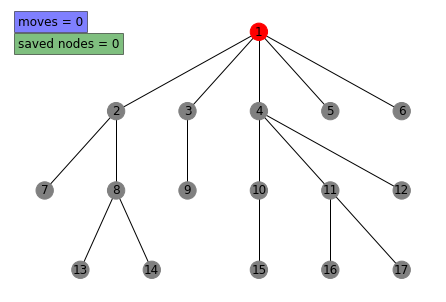

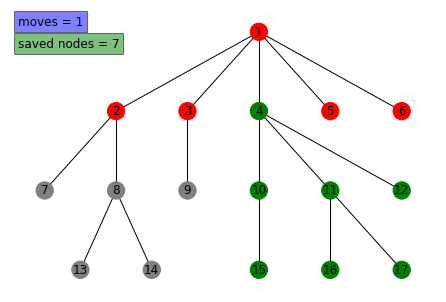

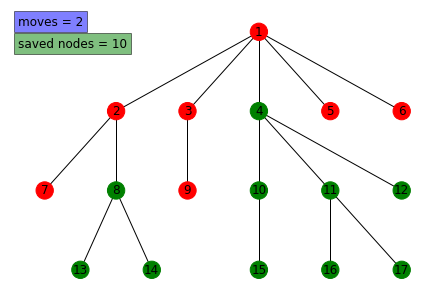

In [9]:
    

if __name__ == '__main__':
    root = Node(1)
    (root.child).append(Node(2))
    (root.child).append(Node(3))
    (root.child).append(Node(4))
    (root.child).append(Node(5))
    (root.child).append(Node(6))
    (root.child[0].child).append(Node(7))
    (root.child[0].child).append(Node(8))
    (root.child[1].child).append(Node(9))
    (root.child[2].child).append(Node(10))
    (root.child[2].child).append(Node(11))
    (root.child[2].child).append(Node(12))
    (root.child[0].child[1].child).append(Node(13))
    (root.child[0].child[1].child).append(Node(14))
    (root.child[2].child[0].child).append(Node(15))
    (root.child[2].child[1].child).append(Node(16))
    (root.child[2].child[1].child).append(Node(17))

    # root = Node(1)
    # (root.child).append(Node(2))
    # (root.child).append(Node(3))
    # (root.child[0].child).append(Node(4))
    # (root.child[0].child).append(Node(5))
    # (root.child[0].child).append(Node(6))
    # (root.child[0].child).append(Node(7))
    # (root.child[1].child).append(Node(8))
    # (root.child[1].child).append(Node(9))
    # (root.child[1].child[0].child).append(Node(10))
    # (root.child[1].child[0].child).append(Node(11))
    # (root.child[1].child[1].child).append(Node(12))


    fighter = FireFighter(root)
    level_order = fighter.levelOrder()
    places = fighter.get_placement()
    print("Number of Nodes Saved =",sum([n.descendants for n in places])+len(places))
    
    vis1 = Visualise(root)
    vis1.show_moves(places, level_order)